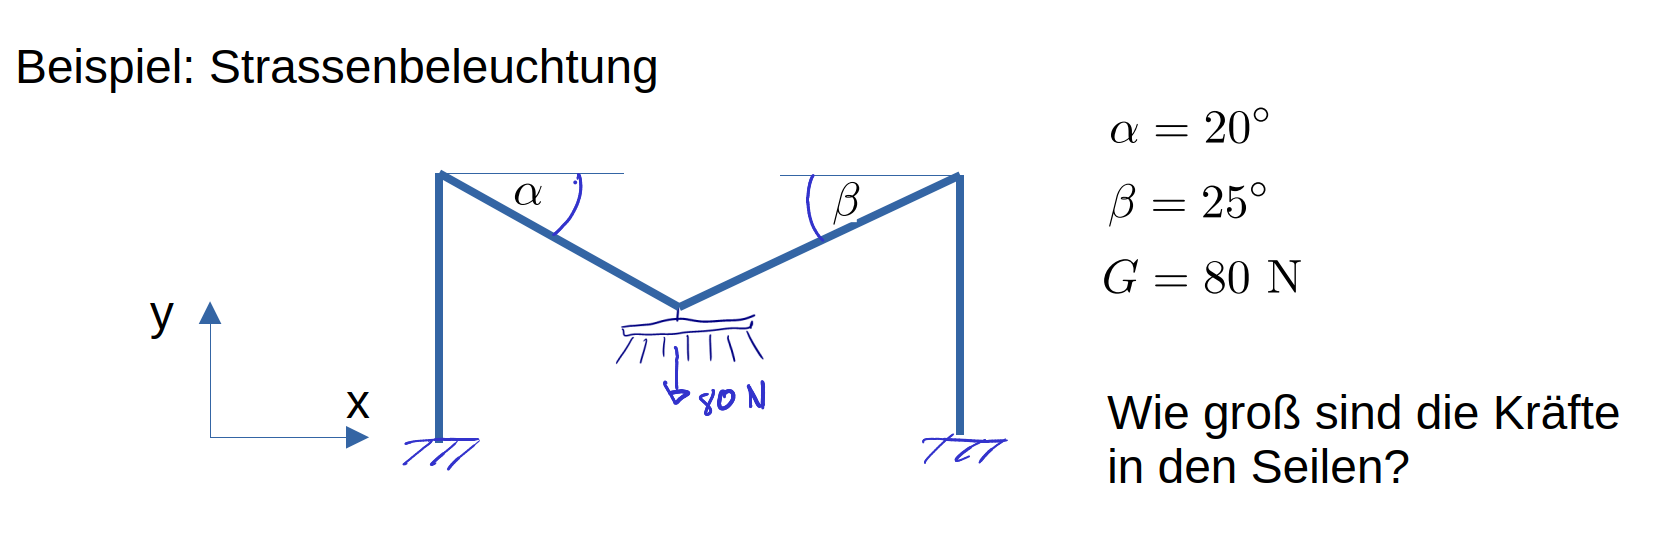

In [1]:
from numpy import array,cos,radians,sin
from numpy.linalg import solve
# Kräftegleichgewicht
# Beispiel Strassenbeleuchtung
G=80
alp=20
beta=25
alp=radians(alp)
beta=radians(beta)
S=array([0,0])
k=array([[-cos(alp), cos(beta)],
         [sin(alp), sin(beta)]])
r=array([0,G])
S=solve(k,r)
print(S)

[102.53702113 106.3140839 ]


(12.5, 3.3333, 1.6667)

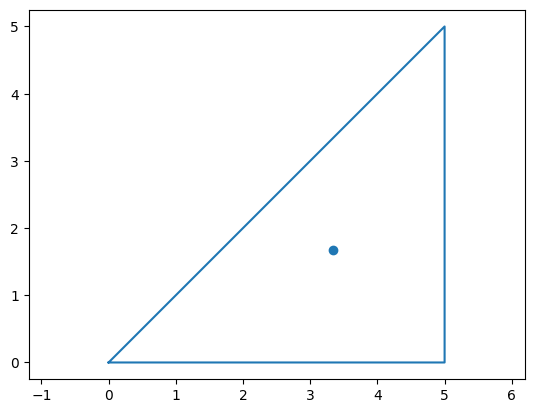

In [2]:
# Schwerpunkt Polygonzug
%reset -f
from numpy import array
from numpy import linspace,pi,cos,sin,append

def circle(middle=(0, 0), parts=1, radius=1):

    phi=linspace(0,-pi*(parts * 2),100)[::-1]

    x = radius*cos(phi) + middle[0]
    y = radius*sin(phi) + middle[1]
    return x,y

#print(circle((1,2), 0.25, 1))

def poly(x,y):
    from matplotlib.pylab import plot, axis, scatter
    if len(x)==0:
        a, sx, sy, xs, ys = 0
    else:
        a=0
        sx=0;
        sy=0;
        for i in range(len(x)-1):
            dxdy=(x[i]*y[i+1]-x[i+1]*y[i])
            a=a+dxdy
            sx=sx+dxdy*(y[i]+y[i+1])
            sy=sy+dxdy*(x[i]+x[i+1])
        a=a/2
        sx=sx/6
        sy=sy/6
        xs=sy/a
        ys=sx/a
        plot (x,y);
        axis ('equal')
        #axis ('off')
        scatter(xs,ys)
    return round(a, 4),round(xs, 4),round(ys, 4)


#x=array([0,0,1,*circle((1,3), parts=0.25)[0],2,3,5,5,0])
#y=array([0,2,2,*circle((1,3), parts=0.25)[1],4,5,5,0,0])
x=array([0,5, 5, 0])
y=array([0,0, 5, 0])

poly(x, y)
#print(poly(x,y))

(0.7854, 0.4244, 0.4244)


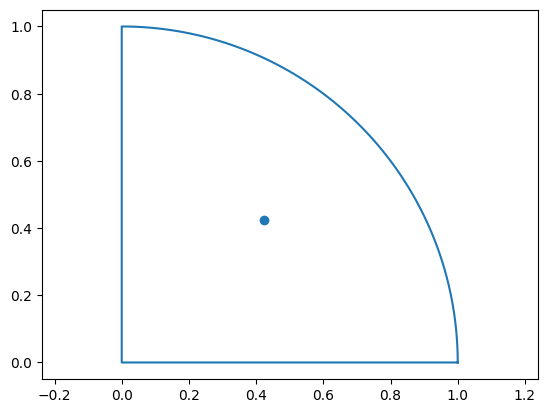

In [3]:
#Flächenschwerpunkt Kreisviertel
from numpy import linspace,pi,cos,sin,append
r=1
phi=linspace(0,pi/2,100)
x=r*cos(phi)
y=r*sin(phi)
x=append(x,[0,1])
y=append(y,[0,0])
print(poly(x,y))

(-0.0, 0.6366, 0.6366)


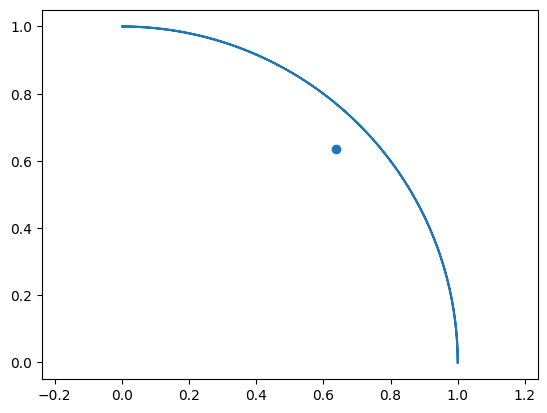

In [4]:
# Linienschwerpunkt Kreisviertelbogen
from numpy import linspace,pi,cos,sin,append, arange
r=1
t=0.000000001
phi=linspace(0,pi/2,100)
x=r*cos(phi)
y=r*sin(phi)

x=append(x,[0])
y=append(y,[r-t])

phi=arange(pi/2,0,-pi/2/100)
x1=(r-t)*cos(phi)
y1=(r-t)*sin(phi)
x=append(x,x1)
y=append(y,y1)

x=append(x,[r])
y=append(y,[0])
print(poly(x,y))



In [5]:
# Integrieren und differenzieren mit sympy
# Vereinfachen und ausrechnen

from sympy import symbols, integrate,sqrt,diff,simplify,expand,sin, E
x=symbols('x')

func = (x * sqrt(x))

# integrate
t=integrate(func)
display(t)

#differentiate
# t=diff(t)
# display(func)

#simplify
display(simplify(t))


# display(expand((x-2)**2))

2*x**(5/2)/5

2*x**(5/2)/5

Integrale:
--------------------


2*x**(3/2)/3

-2*x**(3/2)/3

--------------------
Fläche: (|F(x)| + |G(x)|)


4*sqrt(3)

--------------------
Schwerpunkt: 


Point2D(9/5, 0)

--------------------
Xs oben / unten 


4*x**(5/2)/5

4*x**(3/2)/3

--------------------
Ys oben / unten 


0

4*x**(3/2)/3

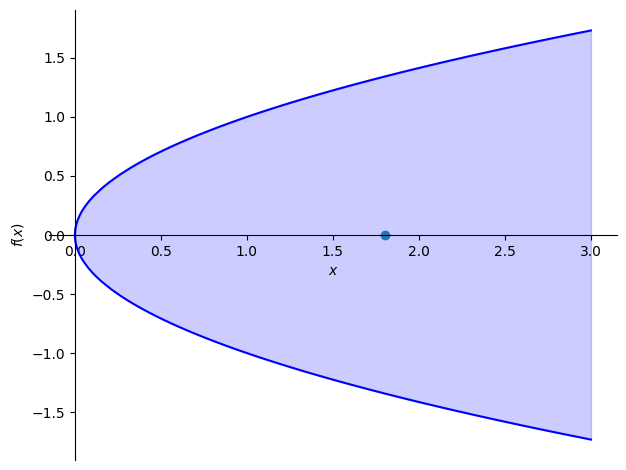

In [6]:
# Flächenschwerpunkt von zwei Graphen

from sympy.abc import a, x, y
from sympy.plotting import plot
from sympy.plotting.plot import MatplotlibBackend, Plot
from sympy import Point, integrate, sqrt, simplify, sin, cos, E, lambdify, Eq, S
import numpy as np
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)
    backend.process_series()
    backend.fig.tight_layout()
    return backend.ax[0]

a = 0 # Untere Grenze
b = 3 # Obere Grenze

# f(x)
func1 = sqrt(x)
# g(x)
func2 = -sqrt(x)

# Integrieren für Fläche
t1=integrate(func1, (x, a, b))
t2=integrate(func2, (x, a, b))

### Rechenweg
print("Integrale:")
print("-"*20)
display(integrate(func1))
display(integrate(func2))
print("-"*20)
### 

print("Fläche: (|F(x)| + |G(x)|)")

display(abs(t1) + abs(t2))

# x und y Koordinaten für Flächenschwerpunkt berechnen (siehe unten)
sx = simplify(integrate(x * (func1 - func2), (x, a, b)) / integrate(func1 - func2, (x, a, b)))
sy = simplify(0.5 * (integrate((func1 ** 2 - func2 ** 2), (x, a, b)) / integrate(func1 - func2, (x, a, b))))

point = Point(sx, sy)

# plotten der Graphen und des Punktes
print("-"*20)
print("Schwerpunkt: ")
display(point)

p1 = plot(func1, (x, a, b), show=False, line_color="blue", fill={"x": np.linspace(a,b,1000), "y1": lambdify(x, func1)(np.linspace(a,b,1000)), "y2": lambdify(x, func2)(np.linspace(a,b,1000)), "color": "blue", "alpha": 0.2})

p2 = plot(func2, (x, a, b), show=False, line_color="blue")
p1.append(p2[0])

axe = get_sympy_subplots(p1)
axe.plot([sx], [sy], 'o');

print('-'*20)
print("Xs oben / unten ")
display(integrate( x * (func1 - func2)))
display(integrate(func1 - func2))
print('-'*20)
print("Ys oben / unten ")
try:
    display(integrate((func1 ** 2 - func2 ** 2)))
except ValueError:
    display(0)
display(integrate(func1 - func2))

Flächenschwerpunkt von Fläche zwischen 2 Graphen:

$$ x_{S} = \frac{\int_{a}^{b}x*[f(x) - g(x)] dx}{\int_{a}^{b}[f(x) - g(x)] dx} 


\\~\\~\\

y_{S} = \frac{1}{2}*\frac{\int_{a}^{b}[f^{2}(x) - g^{2}(x)] dx}{\int_{a}^{b}[f(x) - g(x)] dx}


Segment: 0 - 250 (Cut at: 125) Segment: 250 - 500 (Cut at: 375) Segment: 500 - 750 (Cut at: 625) Segment: 750 - 1000 (Cut at: 875)
Reaction forces:
[R1 + R3 + 6000, 250*R1 + 750*R3 + 3750000]
{R1: -1500, R3: -4500}
Equilibrium equations for each segment:
--------------------
1000 = -Fq1
Fq1 = [-1000]
--------------------
--------------------
1000 - 1500 = -Fq2
Fq2 = [500]
--------------------
--------------------
q*(x - 500) + 1000 - 1500 = -Fq3
Fq3 = [5500 - 10*x]
--------------------
--------------------
q*(x - 500) + 1000 - 1500 - 4500 = -Fq4
Fq4 = [10000 - 10*x]
--------------------

                                    Beam points                                    
     Coordinate              Type                 Load                Moment       
-----------------------------------------------------------------------------------
         0             Continuity point           1000                  0          
        250             Pinned Support             0                 

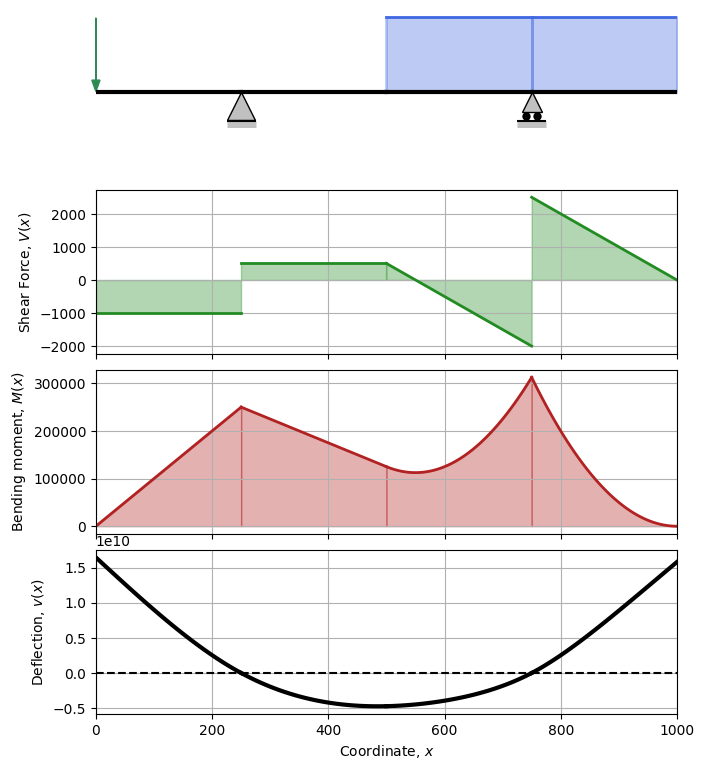

In [3]:
from symbeam_mod import beam


b = beam(length=1000)

# Forces in kN (kN/m)
# Support types: pin, roller, fixed, hinge
b.add_support(250, 'pin')
b.add_support(750, 'roller')

# Load types: point, moment, distributed
b.add_point_load(0, -1000)
b.add_distributed_load(500, 1000, -10)


b.solve(show_calculations=True)
b.plot();




Bei Winkel 15.0°:
Sigma eta: 105.981
Sigma xi: 14.019
Tau eta xi: -19.641
______________________________
Bei Winkel 30.0°:
Sigma eta: 109.641
Sigma xi: 10.359
Tau eta xi: 5.981
______________________________


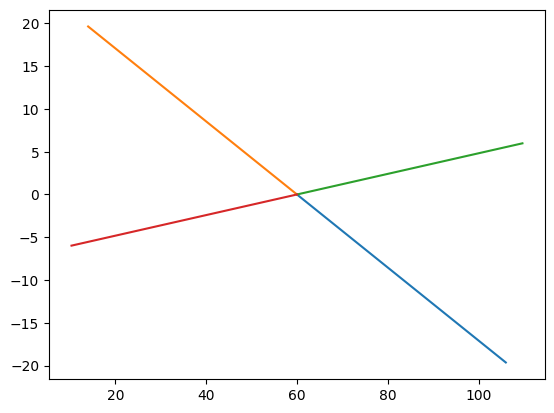

In [ ]:
%reset -f

from numpy import radians, degrees
from pylab import plot, cos, sin


sigma_x = 30
sigma_y = 90
tau_x = -40

winkel1 = radians(15)
winkel2 = radians(30)

def spannung(winkel1):
    print(f"Bei Winkel {round(degrees(winkel1), 2)}°:")
    sigma_eta = (sigma_x+sigma_y)/2-(sigma_x-sigma_y)/2*cos(2*winkel1)-tau_x*sin(2*winkel1)
    print(f"Sigma eta: {round(sigma_eta,3)}")
    sigma_xi = (sigma_x+sigma_y)/2+(sigma_x-sigma_y)/2*cos(2*winkel1)+tau_x*sin(2*winkel1)
    print(f"Sigma xi: {round(sigma_xi,3)}")
    tau_eta_xi = -(sigma_x-sigma_y)/2*sin(2*winkel1)+tau_x*cos(2*winkel1)
    print(f"Tau eta xi: {round(tau_eta_xi,3)}")
    sm = (sigma_x+sigma_y) / 2
    plot([sm,sigma_eta],[0,tau_eta_xi])
    plot([sm,sigma_xi],[0, -tau_eta_xi])
    print("_"*30)

spannung(winkel1)
spannung(winkel2)



